In [1]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import numpy as np
import pandas as pd

In [2]:
input_xlsx = pd.read_excel( './data/E_Commerce_Dataset.xlsx' , sheet_name='E Comm' )
input_xlsx.to_csv(r'./data/E_Commerce_Dataset.csv', index = None, header=True)

In [3]:
input_xlsx.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
input_data = './data/E_Commerce_Dataset.csv'

mode = 'correlated_attribute_mode'
description_file = f'./out/{mode}/description.json'
synthetic_data = f'./out/{mode}/sythetic_data.csv'

In [5]:
threshold_value = 20 

categorical_attributes = {'OrderAmountHikeFromlastYear': True}

candidate_keys = {'DaySinceLastOrder': False}

epsilon = 1

degree_of_bayesian_network = 2

num_tuples_to_generate = 1000

In [6]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)

describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT NumberOfAddress
Adding attribute PreferedOrderCat
Adding attribute CashbackAmount
Adding attribute OrderAmountHikeFromlastYear
Adding attribute SatisfactionScore
Adding attribute Gender
Adding attribute CouponUsed
Adding attribute HourSpendOnApp
Adding attribute OrderCount
Adding attribute DaySinceLastOrder
Adding attribute PreferredLoginDevice
Adding attribute NumberOfDeviceRegistered
Adding attribute WarehouseToHome
Adding attribute CityTier
Adding attribute Complain
Adding attribute Churn
Adding attribute Tenure
Adding attribute PreferredPaymentMode
Adding attribute MaritalStatus
========================== BN constructed ==========================


In [7]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    PreferedOrderCat            has parents ['NumberOfAddress'].
    CashbackAmount              has parents ['PreferedOrderCat', 'NumberOfAddress'].
    OrderAmountHikeFromlastYear has parents ['CashbackAmount', 'NumberOfAddress'].
    SatisfactionScore           has parents ['CashbackAmount', 'PreferedOrderCat'].
    Gender                      has parents ['OrderAmountHikeFromlastYear', 'PreferedOrderCat'].
    CouponUsed                  has parents ['OrderAmountHikeFromlastYear', 'NumberOfAddress'].
    HourSpendOnApp              has parents ['Gender', 'OrderAmountHikeFromlastYear'].
    OrderCount                  has parents ['HourSpendOnApp', 'CouponUsed'].
    DaySinceLastOrder           has parents ['OrderCount', 'OrderAmountHikeFromlastYear'].
    PreferredLoginDevice        has parents ['OrderCount', 'CashbackAmount'].
    NumberOfDeviceRegistered    has parents ['PreferredLoginDevice', 'SatisfactionScore'].
    WarehouseToHome             has

In [8]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [9]:
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)

attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

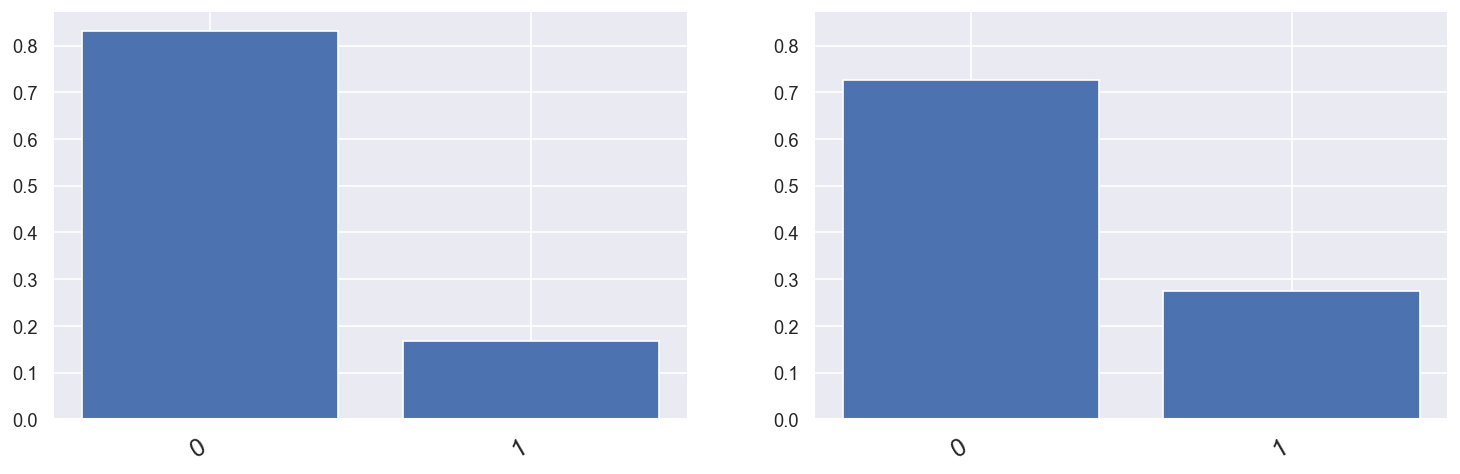

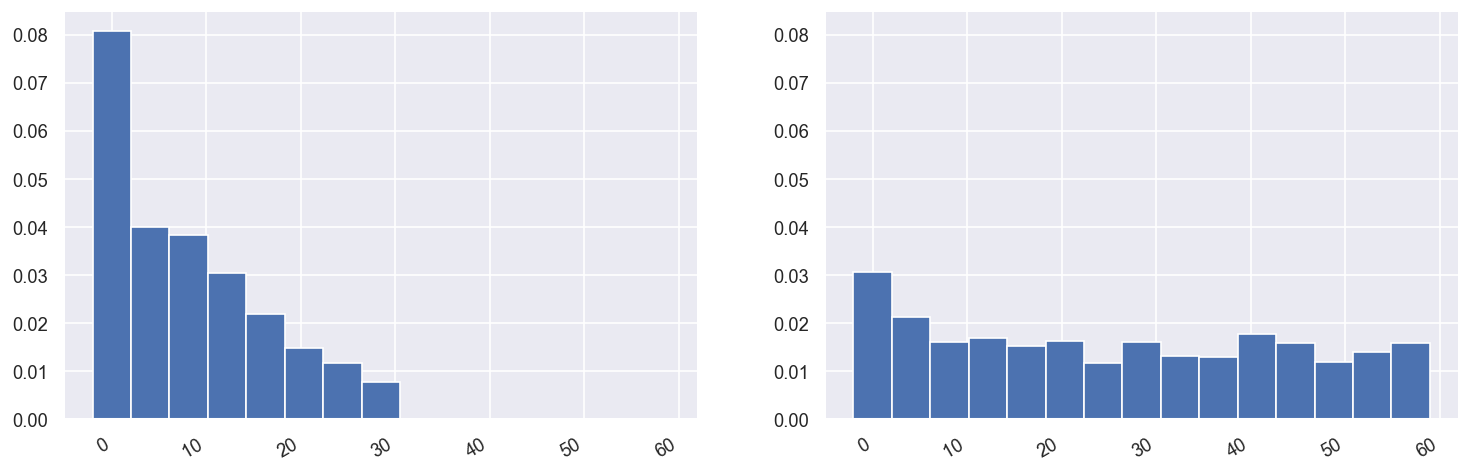

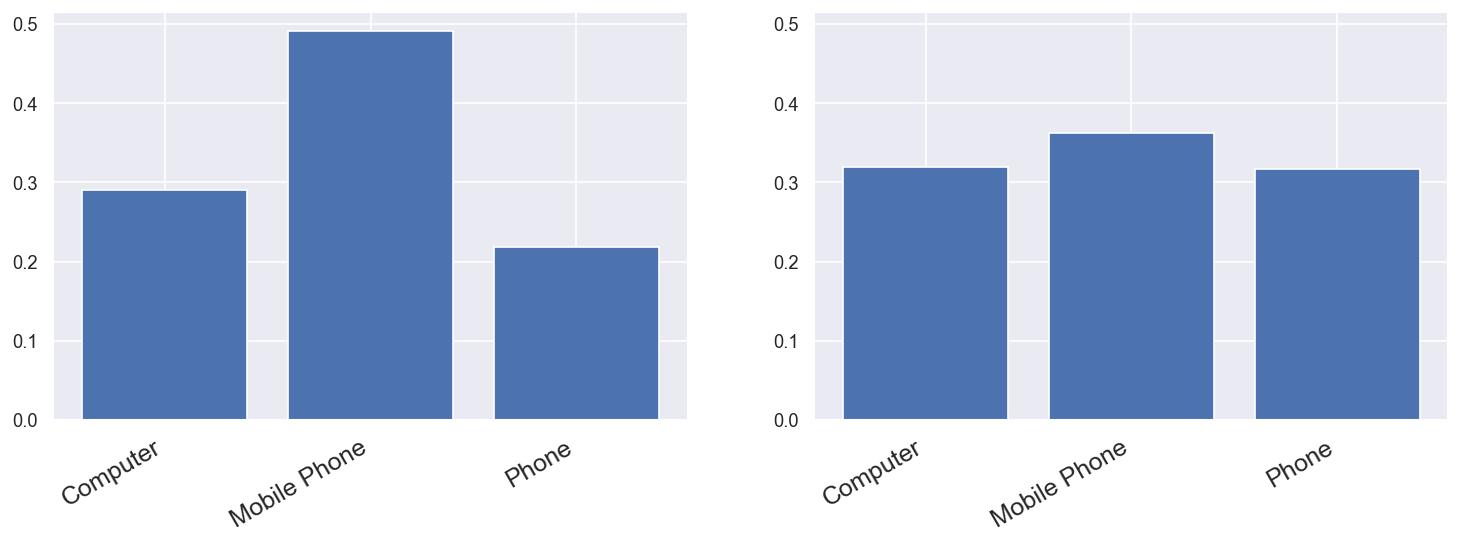

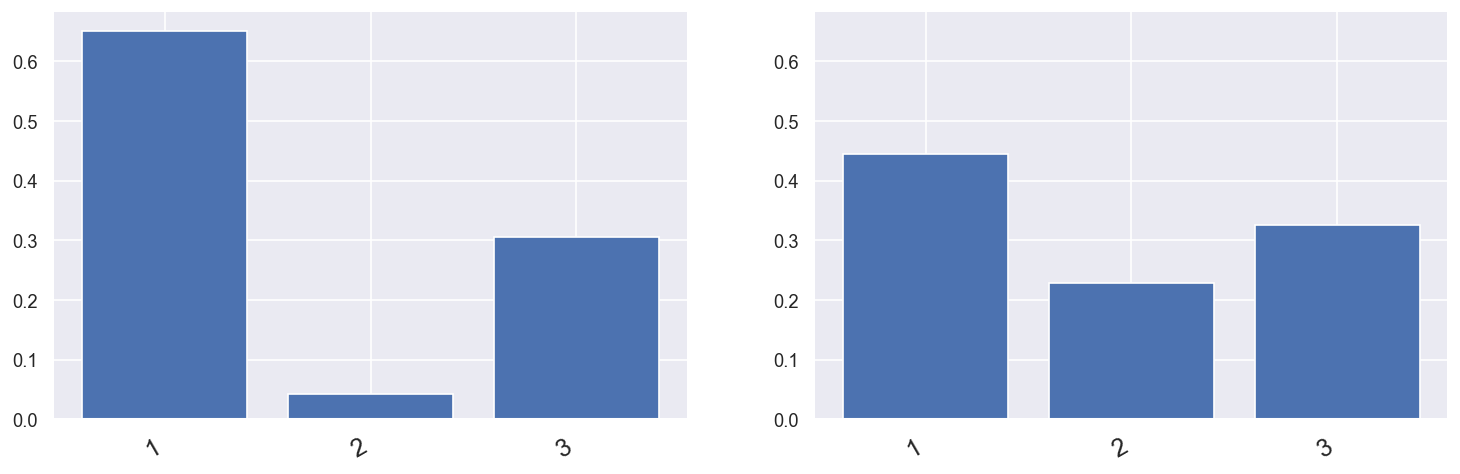

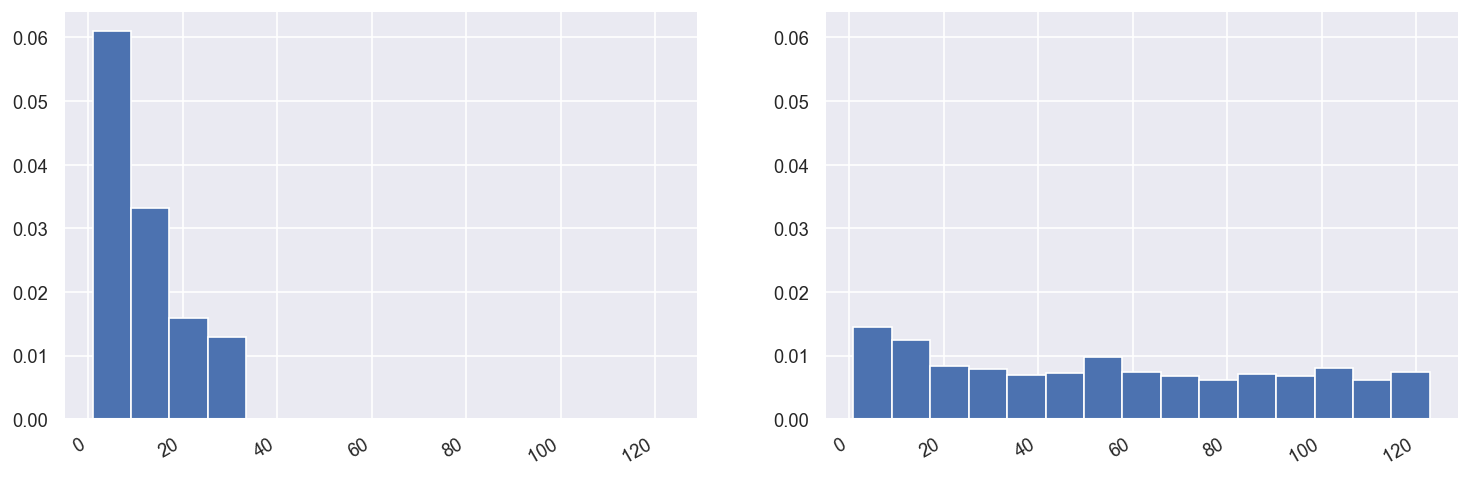

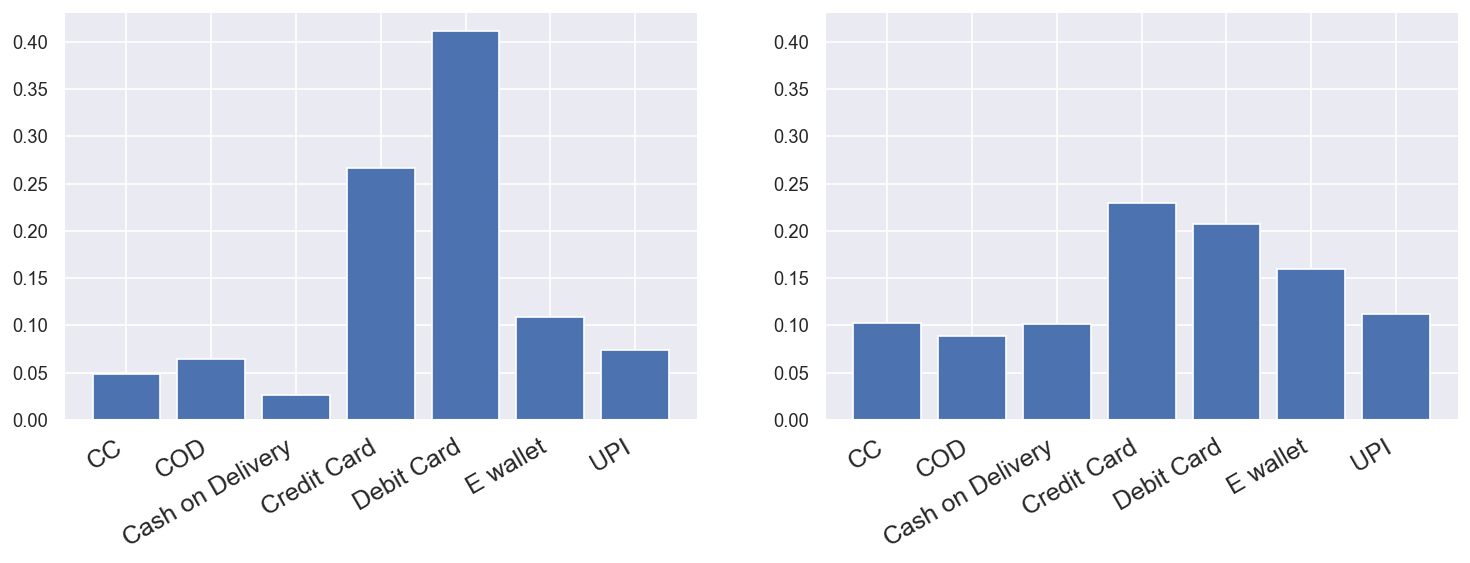

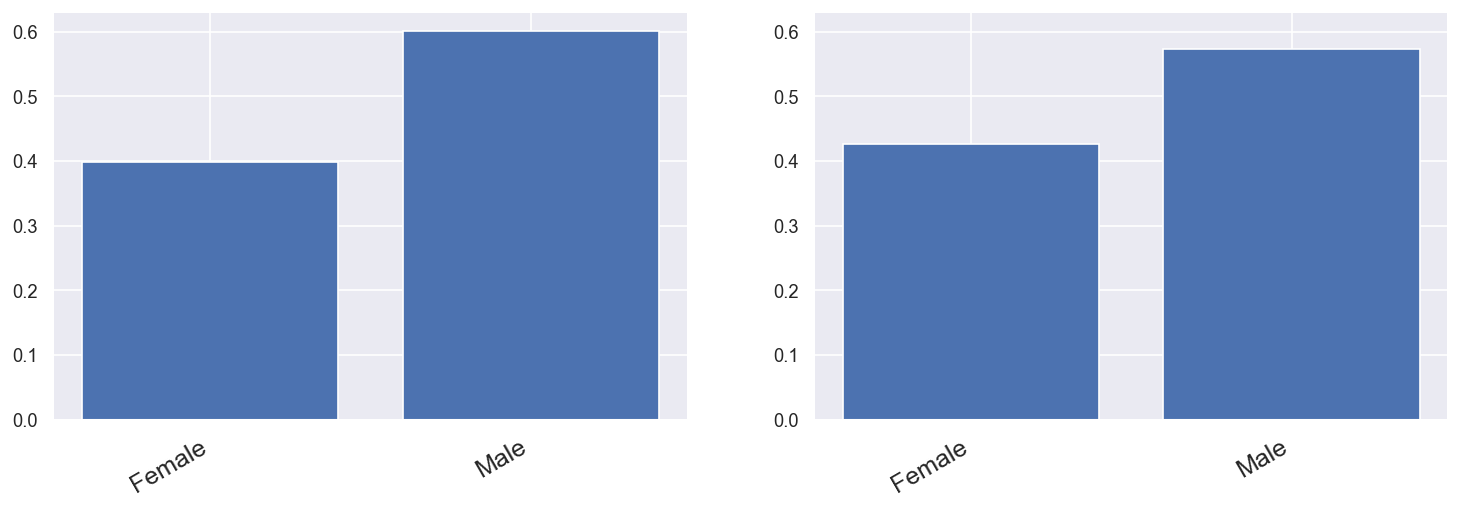

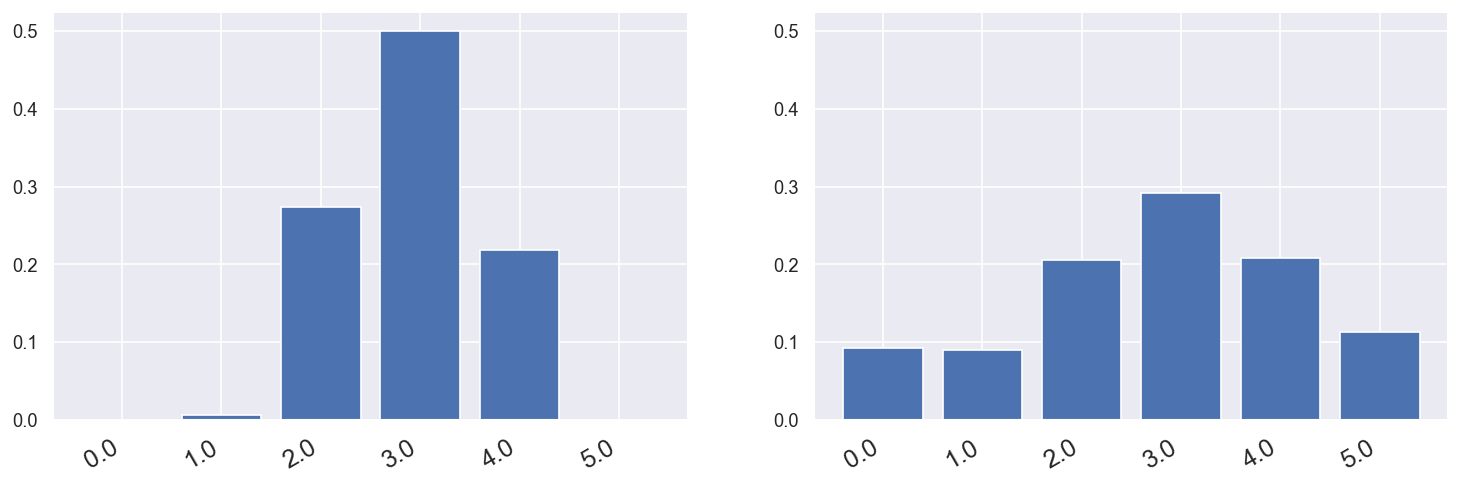

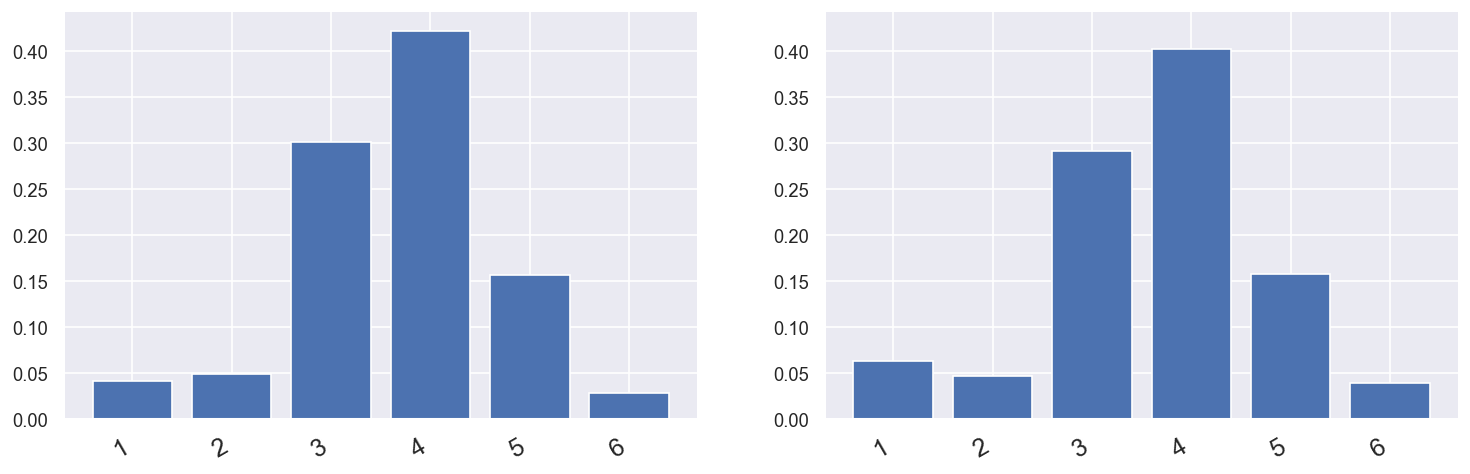

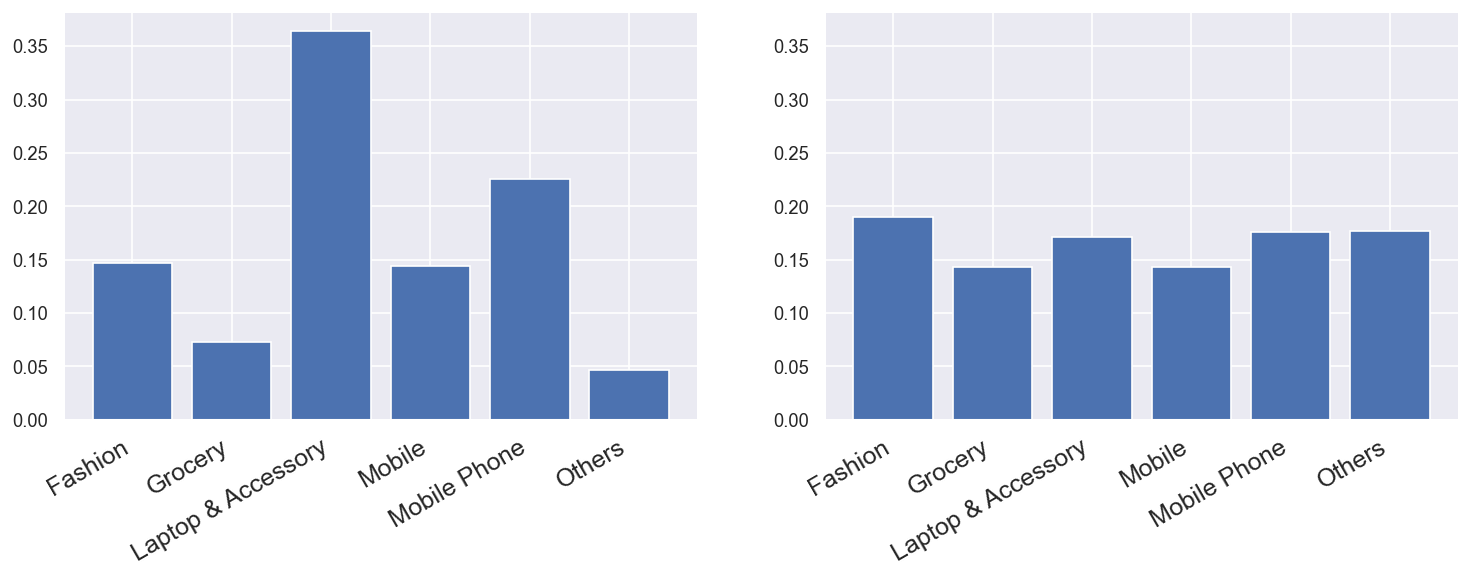

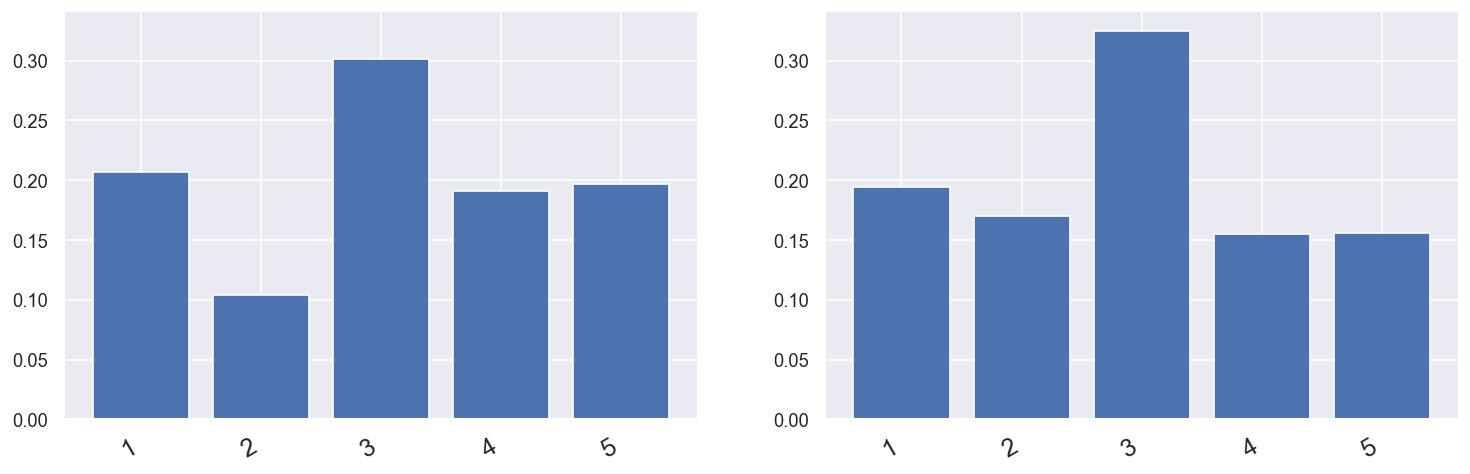

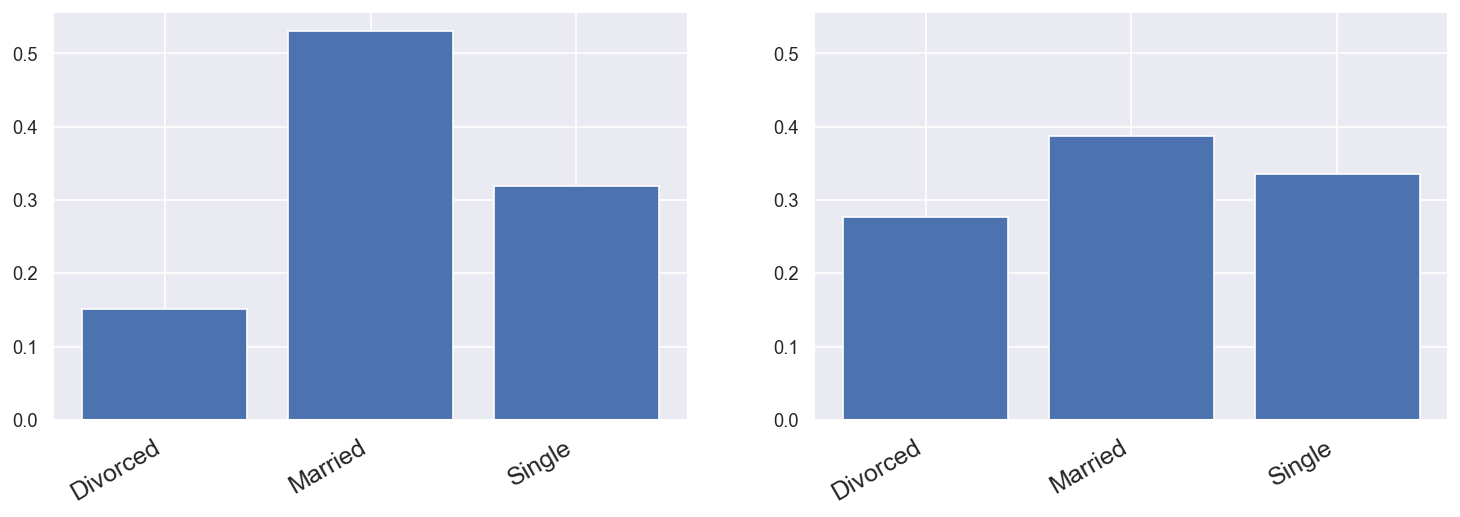

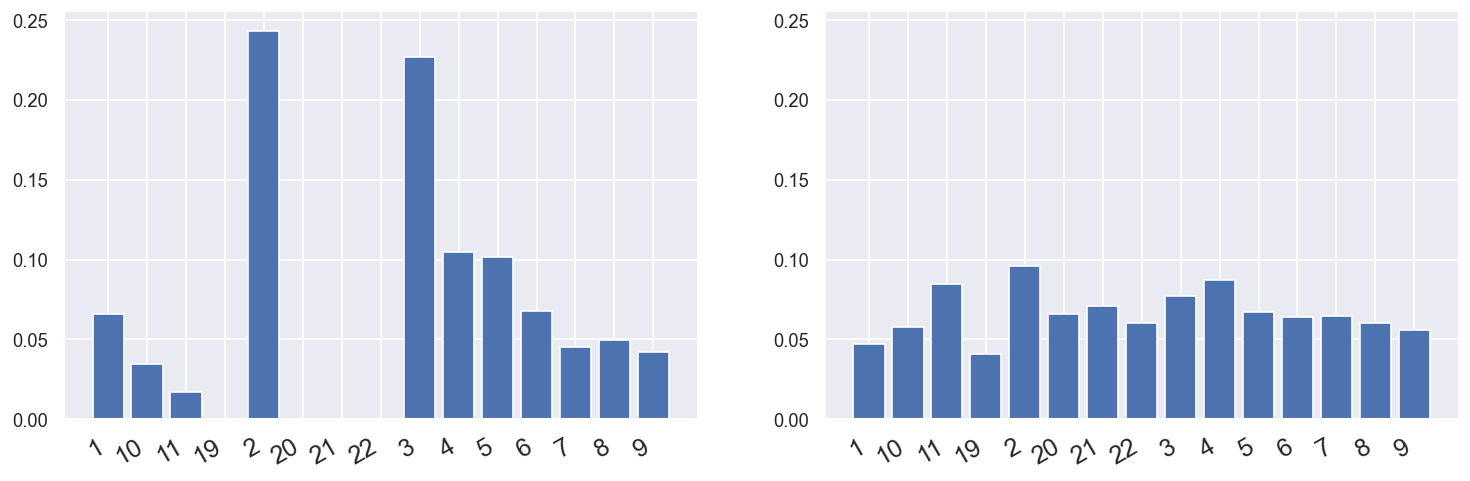

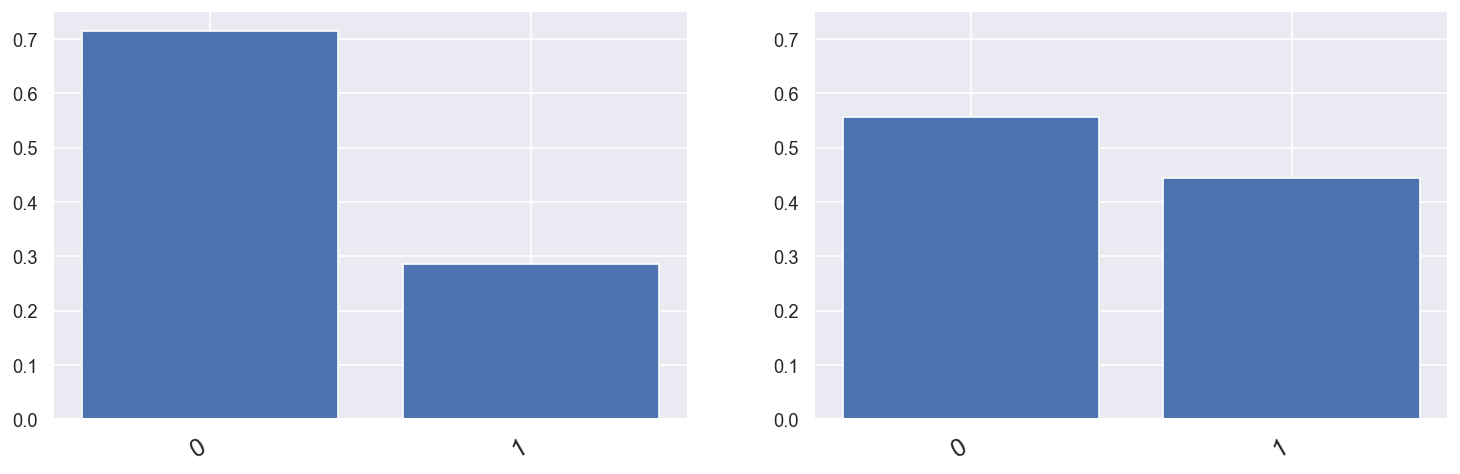

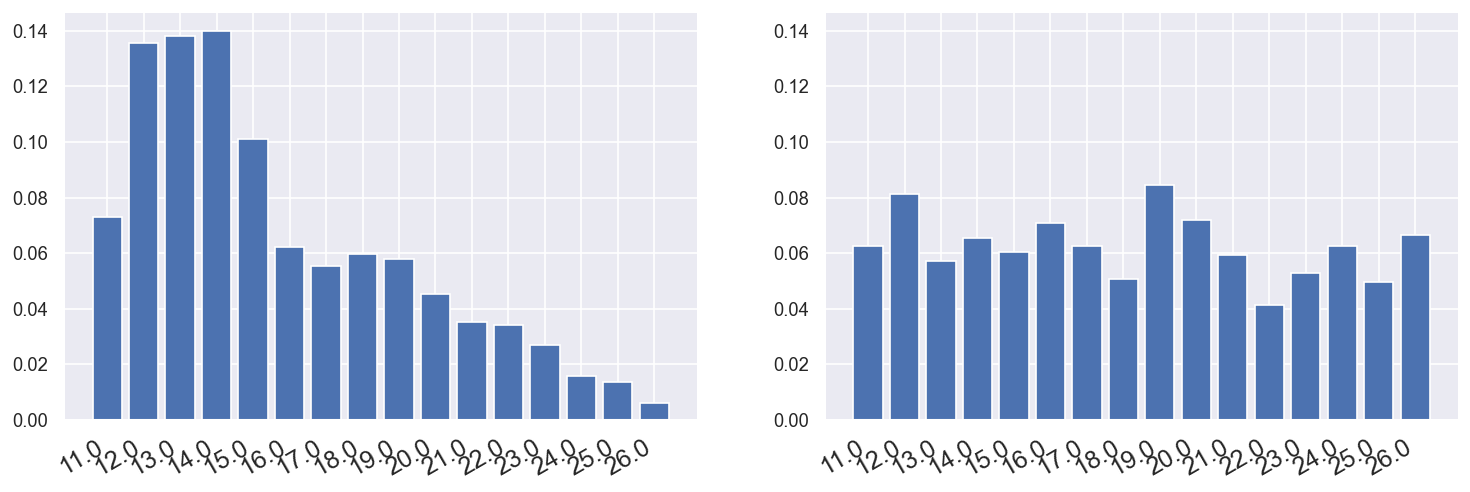

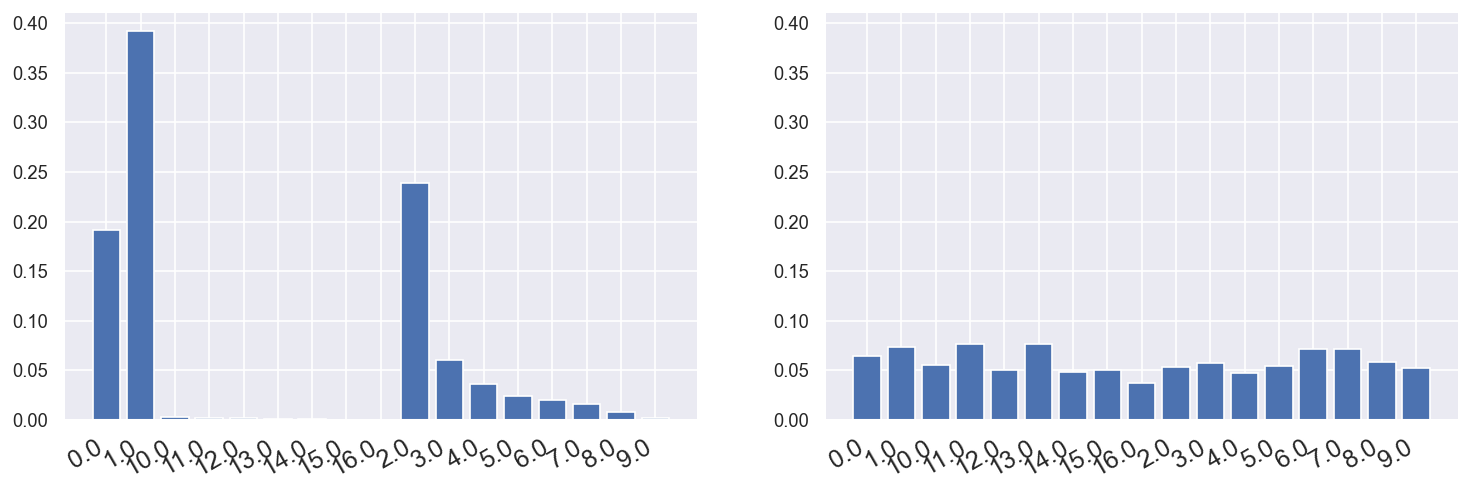

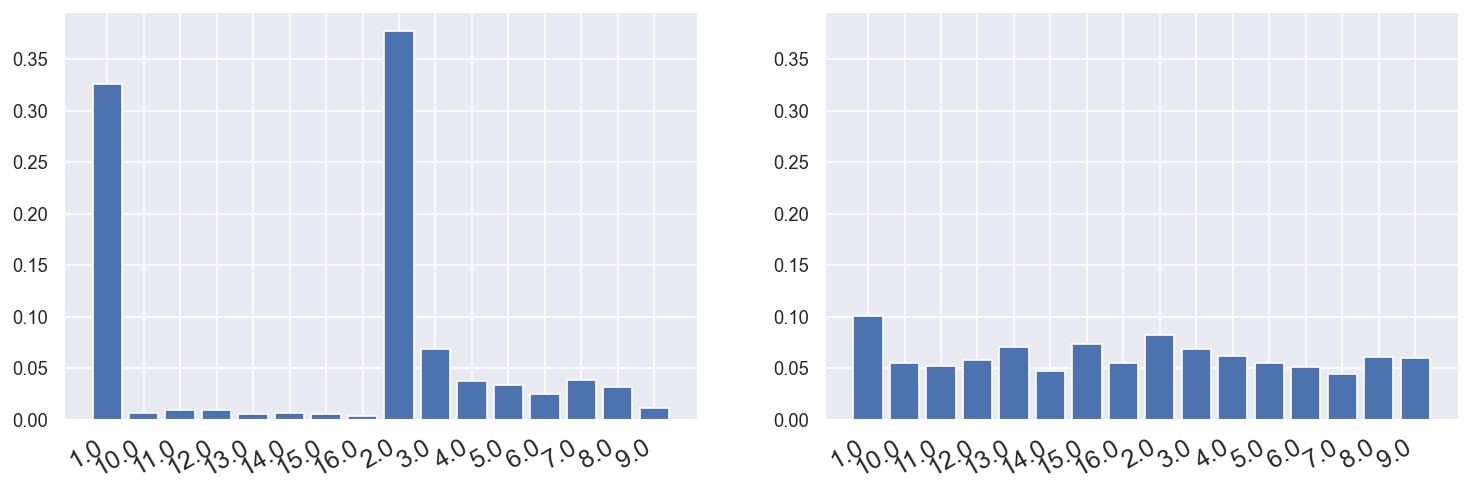

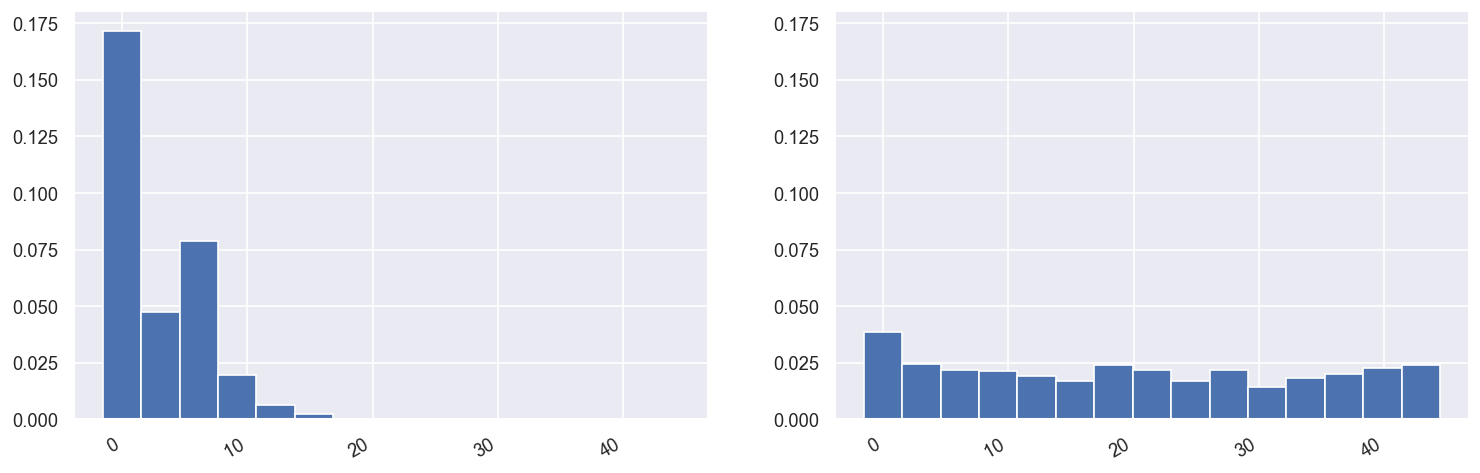

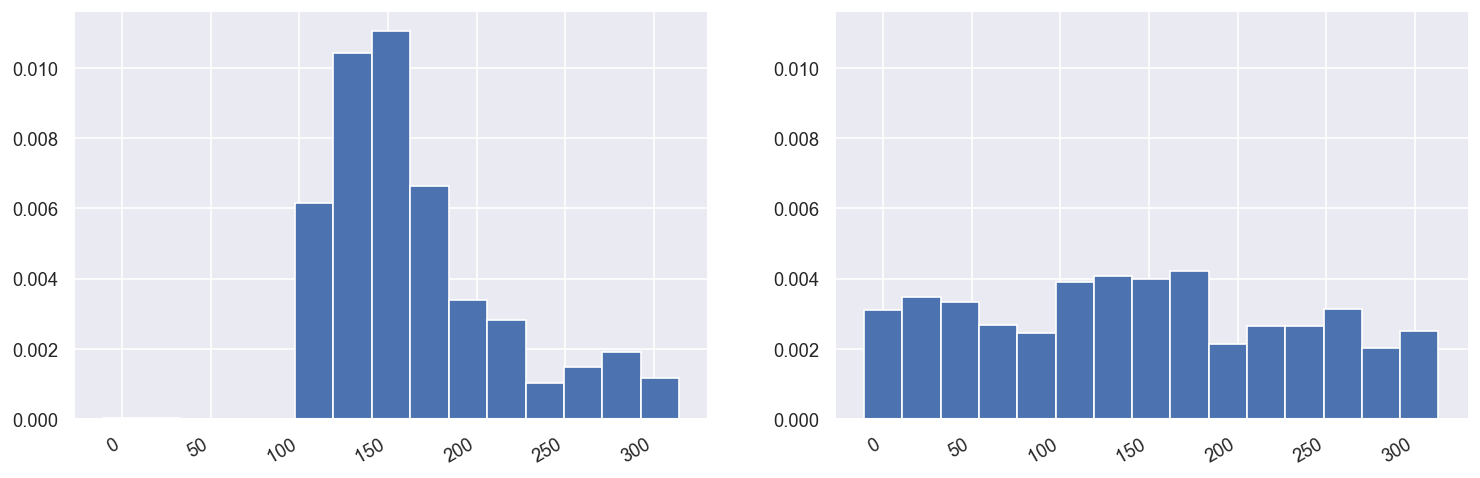

In [10]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

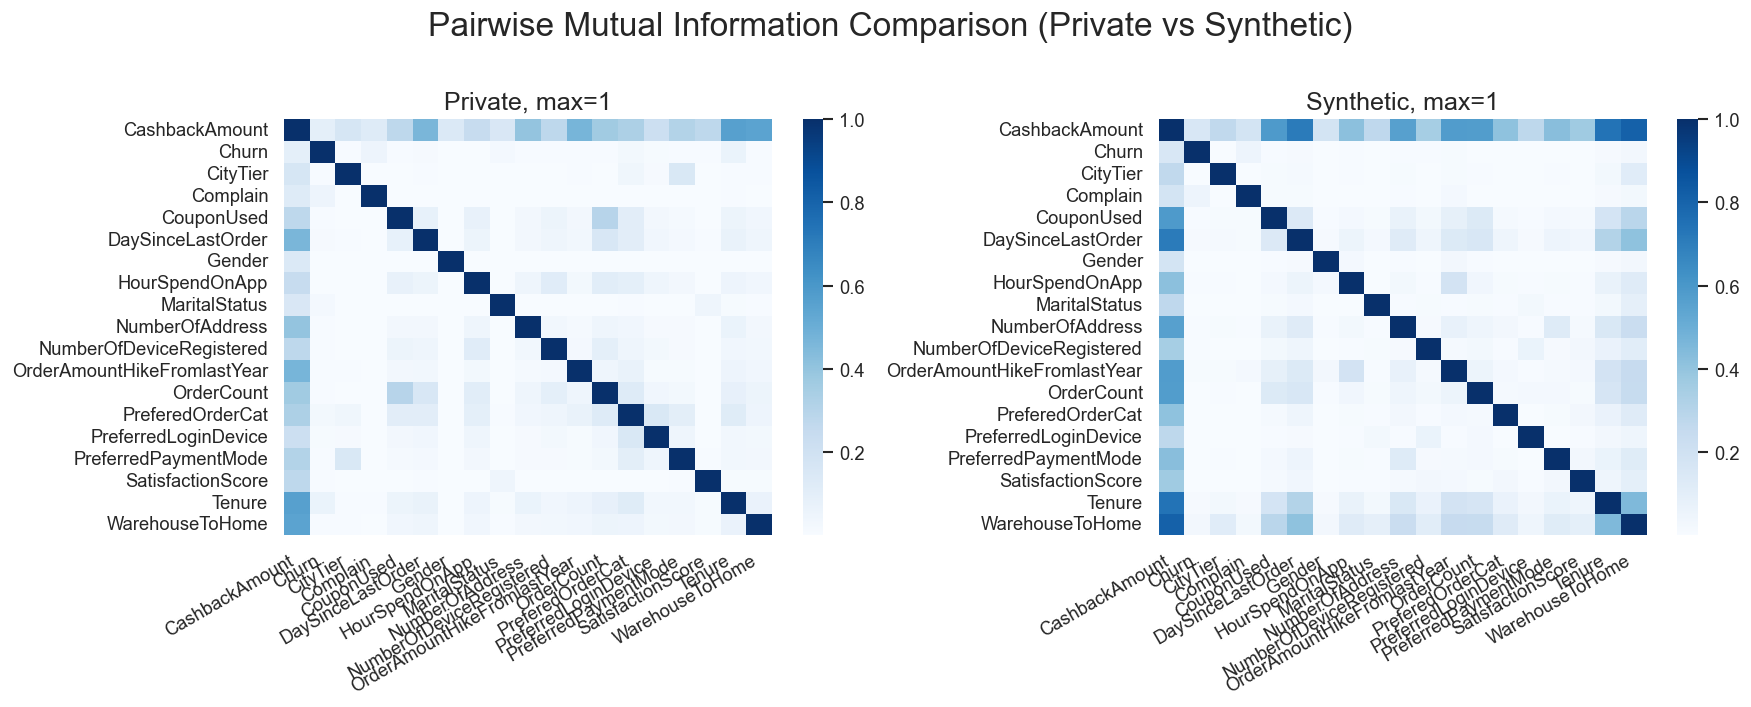

In [11]:
inspector.mutual_information_heatmap()